In [32]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
file_path = "..\csv_completos_limpio\compras_completo_limpio.csv"
df = pd.read_csv(file_path)
df

,identificador,nombre,area,provincia,comunidad_autonoma,codigo_postal,coordenadas,href,antiguedad,conservacion,...,precio,precio_m2,emisiones,consumo,orientacion,calle_alumbrada,agencia,actualizacion,timestamp,tipo_de_casa
0,51748300470_101800,"Casa adosada en calle de la Gran Vía, 7",Corredor Del Henares,Madrid,Comunidad De Madrid,NaN,"40.5438, -3.37927",https://www.pisos.com/comprar/casa_adosada-cam...,NaN,NaN,...,323300.0,2694.0,"A, A","A, A",Sin especificar,Sin especificar,Hercesa,Anuncio actualizado el 28/02/2025,2025-02-28 21:02:41,Casa adosada
1,38350600856_109700,"Casa adosada en calle de la Gran Vía, 12",Corredor Del Henares,Madrid,Comunidad De Madrid,NaN,"40.54455876322138, -3.3799266815185547",https://www.pisos.com/comprar/casa_adosada-cam...,NaN,A estrenar,...,340200.0,2858.0,Error al procesar emisiones,Error al procesar consumo,Sin especificar,Sin especificar,Hercesa,Anuncio actualizado el 08/02/2025,2025-02-28 21:02:42,Casa adosada
2,49206134954_100200,Casa adosada en Villalbilla,Corredor Del Henares,Madrid,Comunidad De Madrid,NaN,"40.4464284, -3.3478297",https://www.pisos.com/comprar/casa_adosada-vil...,Entre 20 y 30 años,A reformar,...,322000.0,1504.0,"E, E","E, E",Sin especificar,Sin especificar,Estudio Villalbilla-El Viso Sl,Anuncio actualizado el 29/01/2025,2025-02-28 21:02:42,Casa adosada
3,35856717666_109700,"Casa adosada en calle de la Gran Vía, 12",Corredor Del Henares,Madrid,Comunidad De Madrid,NaN,"40.54455876322138, -3.3799266815185547",https://www.pisos.com/comprar/casa_adosada-cam...,NaN,A estrenar,...,338370.0,2843.0,Error al procesar emisiones,Error al procesar consumo,Sin especificar,Sin especificar,Hercesa,Anuncio actualizado el 08/02/2025,2025-02-28 21:02:42,Casa adosada
4,51761494757_995907,Chalet unifamiliar en calle de Soto del Henares,Corredor Del Henares,Madrid,Comunidad De Madrid,NaN,"40.4304711, -3.2924094",https://www.pisos.com/comprar/chalet_unifamili...,NaN,En buen estado,...,320000.0,1777.0,"A, A","A, A",Sin especificar,Sin especificar,AVANCE URBANO,Anuncio actualizado el 13/02/2025,2025-02-28 21:02:42,Chalet unifamiliar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399809,48431394446_100500,Piso en calle -,Melilla,Melilla,Melilla,52005.0,"35.2826632, -2.9449037",https://www.pisos.com/comprar/piso-melilla_cen...,NaN,En buen estado,...,105000.0,1693.0,Error al procesar emisiones,Error al procesar consumo,Sin especificar,Sin especificar,Urbana Consulting Grupo XXI,Anuncio actualizado el 16/01/2025,2025-03-03 15:13:24,Piso
399810,48370841753_108700,Piso en Melilla,Melilla,Melilla,Melilla,52006.0,"35.278731151, -2.937359951",https://www.pisos.com/comprar/piso-melilla_cen...,Entre 30 y 50 años,NaN,...,195000.0,2532.0,Error al procesar emisiones,Error al procesar consumo,Sin especificar,Sin especificar,IAD ESPAÑA,Anuncio actualizado el 07/12/2024,2025-03-03 15:13:24,Piso
399811,50838094110_100500,Piso en calle del Gran Capitán,Melilla,Melilla,Melilla,52002.0,"35.2959994, -2.9441408",https://www.pisos.com/comprar/piso-melilla_cen...,NaN,En buen estado,...,158000.0,2164.0,Error al procesar emisiones,Error al procesar consumo,Sin especificar,Sin especificar,Urbana Consulting Grupo XXI,Anuncio actualizado el 29/01/2025,2025-03-03 15:13:24,Piso
399812,48395661430_100500,Piso en calle de Castelar,Melilla,Melilla,Melilla,52001.0,"35.2958781, -2.9415108",https://www.pisos.com/comprar/piso-melilla_cen...,NaN,En buen estado,...,116000.0,1288.0,Error al procesar emisiones,Error al procesar consumo,Sin especificar,Sin especificar,Urbana Consulting Grupo XXI,Anuncio actualizado el 14/11/2024,2025-03-03 15:13:24,Piso


In [34]:
df = df.drop_duplicates(subset="identificador")#df[df.duplicated(subset="identificador", keep=False)].sort_values("identificador")

In [35]:
#hacer un drop.duplicate por indentificador/href antes de empezar

In [36]:
#df['piscina'] = df['piscina'].map({'Si': 1, 'No': 0})
df["piscina"] = df["piscina"].replace({
    "Si": 1, "No": 0, "Sin especificar": 0
})
df["aire_acondicionado"] = df["aire_acondicionado"].replace({
    "Si": 1, "No": 0, "Sin especificar": 0
})
#df['aire_acondicionado'] = df['aire_acondicionado'].map({'Si': 1, 'No': 0})

C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\1026791940.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["piscina"] = df["piscina"].replace({
C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\1026791940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["piscina"] = df["piscina"].replace({
C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\1026791940.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `re

In [37]:
df["latitud"] = df["coordenadas"].str.split(",").str[0].str.strip().astype(float, errors='ignore')
df["longitud"] = df["coordenadas"].str.split(",").str[1].str.strip().astype(float, errors='ignore')

C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\585169796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["latitud"] = df["coordenadas"].str.split(",").str[0].str.strip().astype(float, errors='ignore')
C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\585169796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["longitud"] = df["coordenadas"].str.split(",").str[1].str.strip().astype(float, errors='ignore')


In [38]:
df["precio_m2"] = df["precio_m2"].fillna(df["precio_m2"].median())

C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\792318552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["precio_m2"] = df["precio_m2"].fillna(df["precio_m2"].median())


In [39]:
antiguedad_map = {
    "Menos de 5 años": 2.5, "Entre 5 y 10 años": 7.5, "Entre 10 y 20 años": 15,
    "Entre 20 y 30 años": 25, "Más de 30 años": 35
}
df["antiguedad"] = df["antiguedad"].map(antiguedad_map).fillna(20)  # Rellenar NaN con un valor intermedio

C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\2476833891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["antiguedad"] = df["antiguedad"].map(antiguedad_map).fillna(20)  # Rellenar NaN con un valor intermedio


In [40]:
#superficie construida tenerla que la util, me quedo la tiene menos nans
df["superficie"] = df["superficie"].fillna(df["superficie"].median())
df["superficie_util"] = df["superficie_util"].fillna(df["superficie_util"].median())

C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\2105397662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["superficie"] = df["superficie"].fillna(df["superficie"].median())
C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\2105397662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["superficie_util"] = df["superficie_util"].fillna(df["superficie_util"].median())


In [41]:
df["baños"] = df["baños"].fillna(df["baños"].median())
df["habitaciones"] = df["habitaciones"].fillna(df["habitaciones"].median())

C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\1392387436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["baños"] = df["baños"].fillna(df["baños"].median())
C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\1392387436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["habitaciones"] = df["habitaciones"].fillna(df["habitaciones"].median())


In [42]:
conservacion_map = {
    "A estrenar": 1, "En buen estado": 2, "A reformar": 3
}
df["conservacion"] = df["conservacion"].map(conservacion_map).fillna(2)  # Rellenar con 'En buen estado'

C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\2568478522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["conservacion"] = df["conservacion"].map(conservacion_map).fillna(2)  # Rellenar con 'En buen estado'


In [43]:
df_prueba = df.copy()
df2 = df_prueba[["precio", "antiguedad", "conservacion", "latitud", "longitud", "piscina", "baños","habitaciones","superficie","superficie_util","aire_acondicionado"]]



In [44]:
nan_counts = df2.isna().sum()
nan_counts


precio                0
antiguedad            0
conservacion          0
latitud               0
longitud              0
piscina               0
baños                 0
habitaciones          0
superficie            0
superficie_util       0
aire_acondicionado    0
dtype: int64

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2[["precio", "antiguedad", "conservacion", "latitud", "longitud", "piscina", "baños","habitaciones","superficie","superficie_util","aire_acondicionado"]])


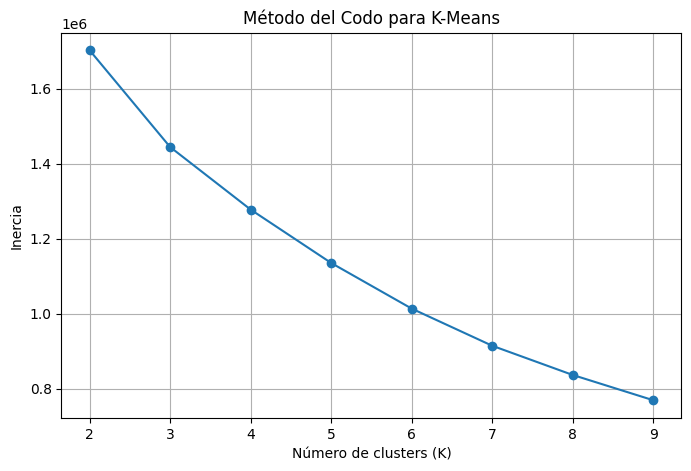

In [46]:
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del Codo para K-Means")
plt.grid()
plt.show()

In [47]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df2['Cluster'] = kmeans.fit_predict(df2)

C:\Users\kikeg\AppData\Local\Temp\ipykernel_15856\296455192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster'] = kmeans.fit_predict(df2)


In [48]:
df2.to_csv("dataset_clustering_kmeans5.csv", index=False)

In [49]:
# Seleccionar las variables (usamos el cluster como una feature)
X = df2.drop(columns=["precio"])  # Variables predictoras (incluye "Cluster")
y = df2["precio"]  # Variable objetivo (precio de la vivienda)

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear y entrenar el modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Evaluar el modelo
score = modelo.score(X_test, y_test)
print(f"Precisión del modelo: {score:.2f}")
train_score = modelo.score(X_train, y_train)
test_score = modelo.score(X_test, y_test)
print(f"Precisión en entrenamiento: {train_score:.2f}")
print(f"Precisión en test: {test_score:.2f}")
y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Raíz del MSE

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
#calcular el error mediano
#mae rmse y error mediano 
#por cadaa cluster entrenar un modelo, repartirmos por cluster y luego comprobamos por cada uno de ellos

Precisión del modelo: 0.89
Precisión en entrenamiento: 0.99
Precisión en test: 0.89
MAE: 85191.62
MSE: 54213654187.10
RMSE: 232838.26


In [51]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test)
print(f"Precisión del modelo base: {dummy_score:.2f}")

Precisión del modelo base: -0.00


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo.fit(X_train_scaled, y_train)
score = modelo.score(X_test_scaled, y_test)
print(f"Precisión del modelo con escalado: {score:.2f}")

Precisión del modelo con escalado: 0.89


In [53]:

modelo2 = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo2.fit(X_train_scaled, y_train)
score = modelo.score(X_test_scaled, y_test)
print(f"Precisión del modelo con escalado: {score:.2f}")

Precisión del modelo con escalado: 0.89


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5
rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5

print(f"MAE Entrenamiento: {mae_train:.2f}, MAE Test: {mae_test:.2f}")
print(f"RMSE Entrenamiento: {rmse_train:.2f}, RMSE Test: {rmse_test:.2f}")

C:\Users\kikeg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


MAE Entrenamiento: 226320.08, MAE Test: 225117.59
RMSE Entrenamiento: 485334.77, RMSE Test: 495920.81


C:\Users\kikeg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [55]:
import numpy as np
nuevo_dato = np.array([[2500, 10, 2, 40.5434,03.0019, 1, 2, 3, 80, 75, 1,3]])  # Datos nuevos
nuevo_dato_escalado = scaler.transform(nuevo_dato)  # Aplicar la misma transformación
prediccion_precio = modelo.predict(nuevo_dato_escalado)
print(f"Precio estimado: {prediccion_precio[0]:,.2f} €")

C:\Users\kikeg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 12 features, but StandardScaler is expecting 11 features as input.